## Plotting of cross-section graphs

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats

import plotting

In [2]:
use_liberation_fonts = True
if use_liberation_fonts:
    plt.rcParams.update({
        'font.family':'sans-serif',
        'font.sans-serif':['Liberation Sans'],
    })

In [3]:
# import CROSS-SECTION (cs) ASV
cs_asv = pd.read_csv('../data/output/valle_cs_1_asv.csv', delimiter=',')

In [4]:
# import CROSS-SECTION (cs) ALS
cs_als = pd.read_csv('../data/output/valle_cs_1_als.csv', delimiter=',')

In [5]:
# import CROSS-SECTION (cs) S2
cs_s2 = pd.read_csv('../data/output/valle_cs_1_s2.csv', delimiter=',')

In [6]:
# check
cs_asv

,ASV_m,ASV
0,0.000000,64.591106
1,0.303629,64.538570
2,0.607257,64.496216
3,0.910886,64.458331
4,1.214515,64.411943
...,...,...
209,63.458397,62.546174
210,63.762026,62.546850
211,64.065654,62.570793
212,64.369283,62.577187


In [7]:
# check
cs_als

,ALS_m,ALS
0,0.000000,64.564885
1,0.303629,64.446173
2,0.607257,64.510843
3,0.910886,64.381237
4,1.214515,64.376307
...,...,...
209,63.458397,65.418287
210,63.762026,65.373920
211,64.065654,65.380339
212,64.369283,65.382920


In [8]:
# check
cs_s2

,S2_m,S2
0,0.000000,62.695300
1,1.214515,62.695300
2,2.429030,62.695300
3,3.643544,62.695300
4,4.858059,62.695300
5,6.072574,62.695300
6,7.287089,62.695300
7,8.501603,62.695300
8,9.716118,62.695300
9,10.930633,62.695300


In [9]:
# rename S2 to SDB
cs_s2 = cs_s2.rename(columns={"S2": "SDB"})

In [10]:
# replace "None" to nan
cs_asv = cs_asv.replace('None', np.nan)
cs_als = cs_als.replace('None', np.nan)
cs_s2 = cs_s2.replace('None', np.nan)

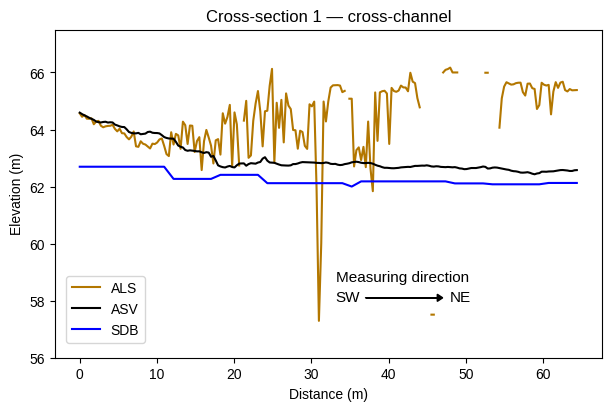

In [18]:
# plot
fig, ax = plotting.init_plot(figsize=(6,4))
ax.set_title('Cross-section 1 — cross-channel')

cs_als.plot(x='ALS_m', color = '#B37700', linestyle="solid", ax=ax)
cs_asv.plot(x='ASV_m', color='black',  linestyle="solid", ax=ax)
cs_s2.plot(x='S2_m', color = '#0000FF', linestyle="solid", ax=ax)
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Elevation (m)")
#ax.axis('equal')
ax.set_ylim(56,67.5) # 9.6,18.3 for Nuorgam
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.177, 0.271))
fig.text(0.55, 0.31, 'Measuring direction', fontsize=11)
fig.text(0.55, 0.26, 'SW', fontsize=11) # start point of the compass 
fig.text(0.74, 0.26, 'NE', fontsize=11) # end point of the compass
ax.arrow(37, 58.1, 10, 0, 
         length_includes_head=True, head_width=0.25, head_length=0.7, 
         color='black'
        )

In [19]:
# save as png
plotting.save_plot(fig=fig, name='valle_cs_1_v3', dpi=600)